In [1]:
from discopy.drawing import Equation
from spiders import W, Id, Z, Swap, box_states
from pyfile import eq

In [2]:
def T(A, n):
    # return A^n
    if n == 1: return A
    return A @ T(A, n-1)

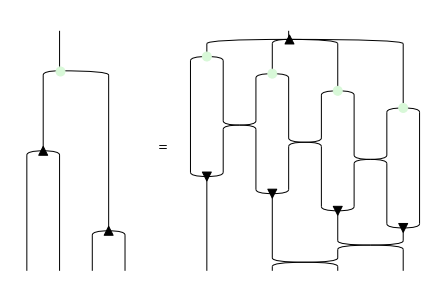

True

In [3]:
p22 = Z(1, 2) >> W() @ W()
p2 = W(4) >> T(Z(1, 2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(W(2).dagger(), 4) >> Id(2) @ Swap >> Id(1) @ Swap @ Id(1)
Equation(p22, p2).draw()
eq(p22, p2)

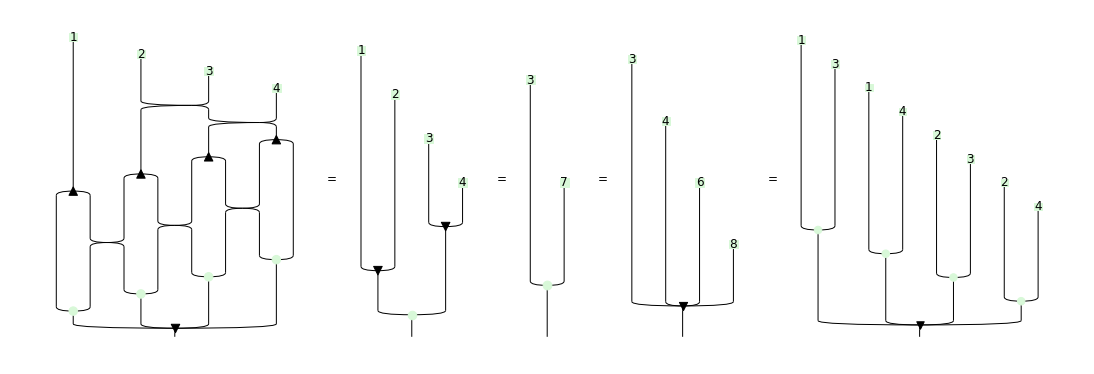

In [4]:
from spiders import ZBox
# (a + b)(c + d) = ac + ad + bc + bd
d1 = box_states([1, 2, 3, 4]) >> p2.dagger()
d2 = box_states([1, 2, 3, 4]) >> p22.dagger()
d3 = box_states([1 + 2, 3 + 4]) >> Z(2, 1)
d4 = ZBox(0, 1, (1 + 2) * (3 + 4))
d4 = box_states([1*3, 1*4, 2*3, 2*4]) >> W(4, False)
d5 = box_states([1, 3, 1, 4, 2, 3, 2, 4]) >> T(Z(2, 1), 4) >> W(4, False)
Equation(d1, d2, d3, d4, d5).draw(figsize=(15, 5))

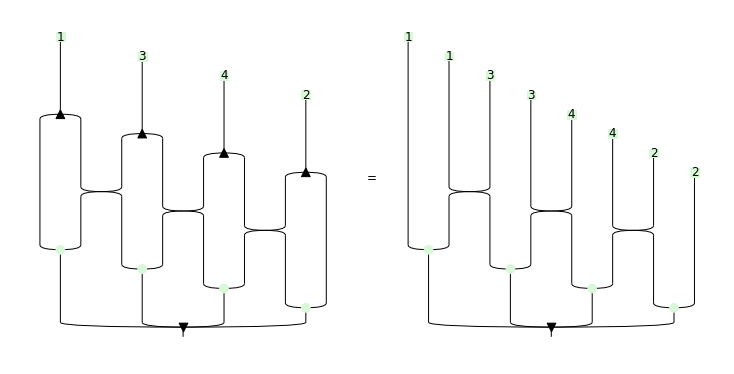

True

In [7]:
e1 = box_states([1, 3, 4, 2]) >> T(W(2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> W(4, False)
e2 = box_states([1, 1, 3, 3, 4, 4, 2, 2]) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> Id(4) @ Swap @ Swap >> T(Z(2, 1), 4) >> W(4, False)
e3 = box_states([1, 1, 3, 3, 4, 4, 2, 2]) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >>  T(Z(2, 1), 4) >> W(4, False)
Equation(e1, e3).draw(figsize=(10, 5))
eq(e1, e3) # swaps on 2 are weird...
